In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji

In [7]:
df = pd.read_excel('labeled data.xlsx')

In [8]:
print(f'Строк: {df.shape[0]:,}, столбцов: {df.shape[1]}')

Строк: 2,373, столбцов: 8


In [9]:
df.head()

,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,2945792,5,спасибо,NaN,NaN,NaN,1.0,NaN
1,3234340,5,спасибо!,NaN,NaN,NaN,1.0,NaN
2,3380332,5,Отлично,NaN,NaN,NaN,1.0,NaN
3,3381812,5,Благодарю за оперативное решение проблемы !,1.0,NaN,NaN,NaN,NaN
4,3461991,5,Прекрасный специалист! Побольше таких,NaN,NaN,1.0,NaN,NaN


In [10]:
duplicates_comments = df[df['comment'].duplicated(keep=False)]['comment']

mask_short = df['comment'].str.len() < 10
short_comments = df.loc[mask_short, ['comment']].copy()
short_comments['length'] = short_comments['comment'].str.len()

duplicates_count = duplicates_comments.shape[0]

print(f"Всего дубликатов отзывов: {duplicates_count}")
print("Примеры дубликатов:")
print(duplicates_comments.head(10).to_string(index=False))

Всего дубликатов отзывов: 702
Примеры дубликатов:
                                     спасибо
                                    спасибо!
                                    Отлично 
Благодарю за оперативное решение проблемы ! 
       Прекрасный специалист! Побольше таких
                                    Спасибо 
                     пересчет, и скорость \n
         Спасибо за обновление покраски стен
                            выполнили быстро
                                   Спасибо! 


In [11]:
df_no_duplicates = df[~df['comment'].duplicated(keep=False)].copy()

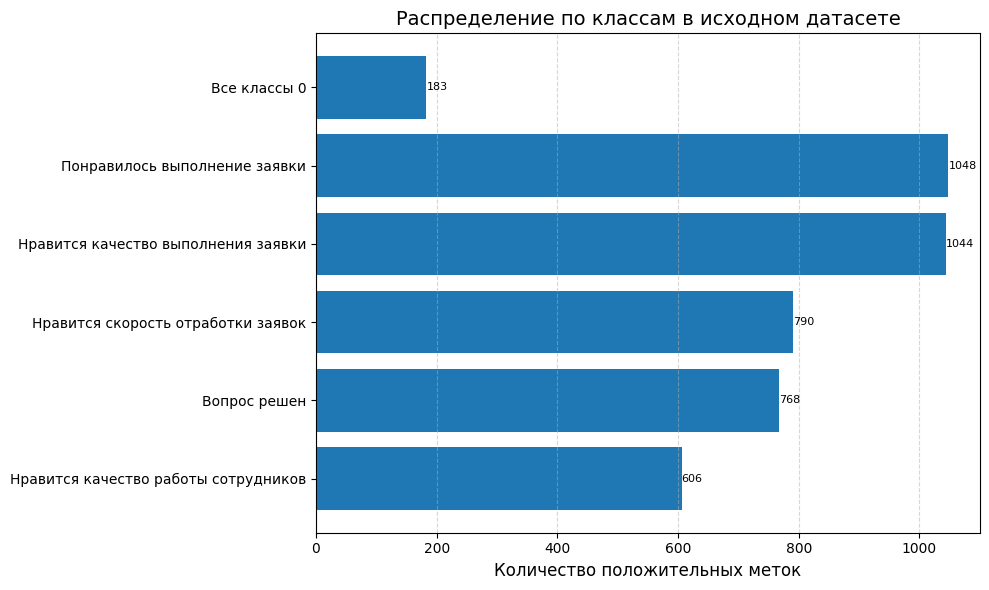

In [12]:
label_cols = [
    "Нравится качество выполнения заявки",
    "Нравится скорость отработки заявок",
    "Вопрос решен",
    "Понравилось выполнение заявки",
    "Нравится качество работы сотрудников"
]

class_distribution = df[label_cols].sum().sort_values(ascending=True)

zero_count = (df[label_cols].sum(axis=1) == 0).sum()

extended_distribution = class_distribution.copy()
extended_distribution["Все классы 0"] = zero_count

plt.figure(figsize=(10, 6))
bars = plt.barh(extended_distribution.index, extended_distribution.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=8)

plt.title("Распределение по классам в исходном датасете", fontsize=14)
plt.xlabel("Количество положительных меток", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
output_path = 'data_new.xlsx'
df_no_duplicates.to_excel(output_path, index=False)

### Переразметим в ручную данные 

In [14]:
df = pd.read_excel('data_new.xlsx')

In [15]:
df.head()

,id,rating,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,3872124,5,"Большое спасибо Александру,за оперативность и ...",1.0,1.0,1.0,NaN,1.0
1,3872129,5,благодарю,NaN,NaN,NaN,1.0,1.0
2,3873692,5,оперативно и качественно. спасибо,1.0,1.0,NaN,NaN,1.0
3,3875262,5,"благодарю, всего доброго!",NaN,NaN,NaN,1.0,1.0
4,3877334,3,К мастеру вопросов нет.,NaN,NaN,1.0,NaN,1.0


In [16]:
print(f'Строк: {df.shape[0]:,}, столбцов: {df.shape[1]}')

Строк: 1,669, столбцов: 8


In [17]:
def replace_emoji_to_text(text):
    return ''.join(
        emoji.demojize(char, delimiters=(" :", ": ")) if char in emoji.EMOJI_DATA else char
        for char in text
    )
df['comment'] = df['comment'].apply(replace_emoji_to_text)

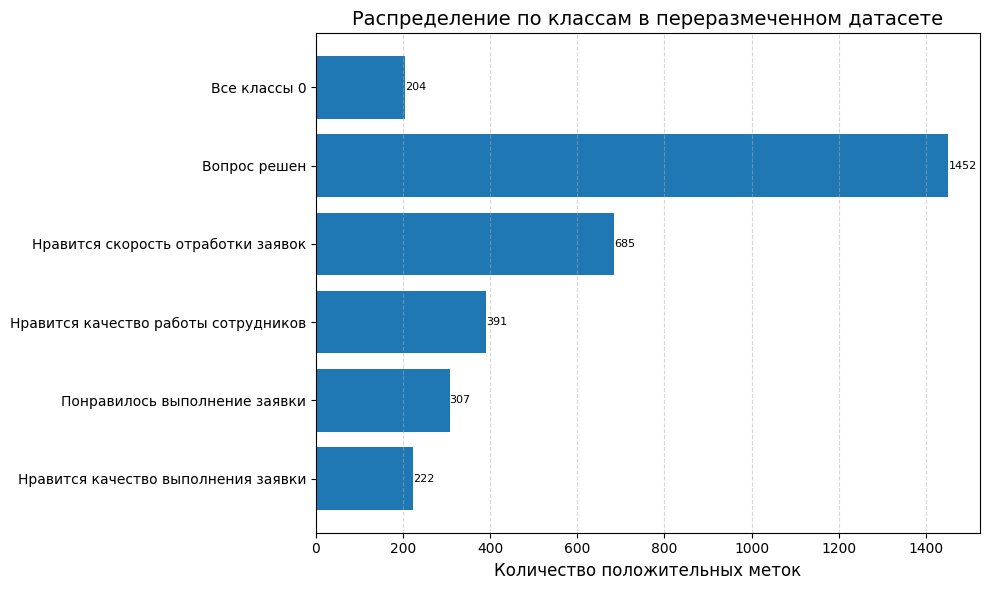

In [18]:
label_cols = [
    "Нравится качество выполнения заявки",
    "Нравится скорость отработки заявок",
    "Вопрос решен",
    "Понравилось выполнение заявки",
    "Нравится качество работы сотрудников"
]

class_distribution = df[label_cols].sum().sort_values(ascending=True)

zero_count = (df[label_cols].sum(axis=1) == 0).sum()

extended_distribution = class_distribution.copy()
extended_distribution["Все классы 0"] = zero_count

plt.figure(figsize=(10, 6))
bars = plt.barh(extended_distribution.index, extended_distribution.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center', fontsize=8)

plt.title("Распределение по классам в переразмеченном датасете", fontsize=14)
plt.xlabel("Количество положительных меток", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.utils import resample
from skmultilearn.model_selection import iterative_train_test_split

np.random.seed(42)
df = (
    df.sample(frac=1, random_state=42)
      .reset_index(drop=True)
)

label_cols = [c for c in df.columns if c not in ["id", "rating", "comment"]]
X = df["comment"].astype(str).values
Y = df[label_cols].fillna(0).astype(int).values

X_tr, y_tr, X_te, y_te = iterative_train_test_split(X.reshape(-1,1), Y, test_size = 0.2)

X_tr = X_tr.ravel()
X_te = X_te.ravel()

train_df = pd.DataFrame({"comment": X_tr})
train_df[label_cols] = y_tr
test_df  = pd.DataFrame({"comment": X_te})
test_df[label_cols]  = y_te

train_df.to_excel("train_80_new.xlsx", index=False)
test_df.to_excel("test_20_new.xlsx", index=False)

print("Train shape:", train_df.shape)
print(train_df[label_cols].sum())
print("Test shape:", test_df.shape)
print(test_df[label_cols].sum())

/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train shape: (1335, 6)
Нравится скорость отработки заявок       548
Нравится качество выполнения заявки      178
Нравится качество работы сотрудников     313
Понравилось выполнение заявки            246
Вопрос решен                            1162
dtype: int64
Test shape: (334, 6)
Нравится скорость отработки заявок      137
Нравится качество выполнения заявки      44
Нравится качество работы сотрудников     78
Понравилось выполнение заявки            61
Вопрос решен                            290
dtype: int64


In [20]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(train_df["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, train_df[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:01<00:00, 10.19it/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.795


### ЧАТ ГПТ 1

In [16]:
import random
from random import sample

random.seed(42)

var = train_df.groupby(['Нравится скорость отработки заявок',
       'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников', 'Понравилось выполнение заявки',
       'Вопрос решен'])['comment'].apply(list)
d = {index: sample(var[index], min(len(var[index]), 5)) for index in var.index}

In [17]:
d = {
    key: '\n'.join(f'"{s}"' for s in value) 
    for key, value in d.items()
}

In [18]:
d

{(0,
  0,
  0,
  0,
  0): '"ответа на вопрос нет"\n"почему не отражается что проверка пройдена, пишет пройти же проверку в лк. даже на сообщение не ответили молча закрыли заявку"\n"не могу найти как открыть новую"\n"в квартире никто не проживает, счётчик электроэнергии в квартире отключён, сам нахожусь в другом регионе, возможности разобраться с утречком электроэнергии нет! просьба подробнее помочь разобраться в решении проблемы!"\n"спасибо,скажите пожалуйста,на андроид откуда можно скачать данное приложение? не получается,пишет,что не поддерживается"',
 (0,
  0,
  0,
  0,
  1): '"ситуация стала лучше, но все равно есть перепады давления"\n"решили, но пришлось 2 раза просить"\n"все работает"\n"Четко и понятно, спасибо"\n"пока работает"',
 (0,
  0,
  0,
  1,
  0): '"спасибо, мусор и дверь вынесли, но полы не помыли"\n"проконсультировали по телефону, обещали перерасчёт в следующем счете. жду счет"\n"огромное спасибо!!!! завтра жду мастера-фломастера"',
 (0,
  0,
  0,
  1,
  1): '"Спасибо

In [ ]:
import re, time, random
import pandas as pd
from tqdm import tqdm
from typing import Optional
from openai import OpenAI, APIError, APIConnectionError, RateLimitError

OPENAI_KEY   = "sk-proj-"
client = OpenAI(api_key=OPENAI_KEY)

train = pd.read_excel("train_80_new.xlsx")

SYSTEM = ("Ты пишешь короткие (1–2-3 предложения) отзывы жильцов "
          "управляющей компании. Пиши строго на русском.")

PROMPT_BASE = (
    "Примеры отзывoв:\n«{ex}»\n\n"
    "{emoji_hint}"
    "Напиши 3-10 похожих, но уникальных отзывов (1–2-3-4 предложения)."
    "Количество отзывов определяй исходя из кол-ва примеров."
    "Не копируй примеры. Отделяй каждый отзыв новой строкой"
)

EMOJI_RE = re.compile(r":[a-z0-9_]+:", flags=re.I)

def gpt_review(example):
    has_code = bool(EMOJI_RE.search(example))
    
    emoji_hint = ("Если в примере есть код эмодзи вида :smile:, "
                  "то сохрани стиль — вставь 1 похожий код эмодзи.\n\n"
                  ) if has_code else ""
    
    prompt = PROMPT_BASE.format(ex=example, emoji_hint=emoji_hint)

    for _ in range(3):
        try:
            r = client.chat.completions.create(
                model="gpt-3.5-turbo-0125",
                temperature=0.7,
                messages=[
                    {"role": "system", "content": SYSTEM},
                    {"role": "user",   "content": prompt}
                ]
            )
            return r.choices[0].message.content.strip()
        except (APIError, APIConnectionError, RateLimitError):
            time.sleep(2)
            print(f'ERROR - {example}')
    return None

synthetic1 = {}
for key, value in d.items():
    example = value
    print(f"{key}: генерируем для {value}")
    
    txt = gpt_review(example)
    if txt:
        synthetic1[key] = txt

(0, 0, 0, 0, 0): генерируем для "ответа на вопрос нет"
"почему не отражается что проверка пройдена, пишет пройти же проверку в лк. даже на сообщение не ответили молча закрыли заявку"
"не могу найти как открыть новую"
"в квартире никто не проживает, счётчик электроэнергии в квартире отключён, сам нахожусь в другом регионе, возможности разобраться с утречком электроэнергии нет! просьба подробнее помочь разобраться в решении проблемы!"
"спасибо,скажите пожалуйста,на андроид откуда можно скачать данное приложение? не получается,пишет,что не поддерживается"
(0, 0, 0, 0, 1): генерируем для "ситуация стала лучше, но все равно есть перепады давления"
"решили, но пришлось 2 раза просить"
"все работает"
"Четко и понятно, спасибо"
"пока работает"
(0, 0, 0, 1, 0): генерируем для "спасибо, мусор и дверь вынесли, но полы не помыли"
"проконсультировали по телефону, обещали перерасчёт в следующем счете. жду счет"
"огромное спасибо!!!! завтра жду мастера-фломастера"
(0, 0, 0, 1, 1): генерируем для "Спа

In [20]:
save1 = pd.DataFrame.from_dict(synthetic1, orient='index', columns=['Текст'])
save1.to_excel("chatgpt1_new.xlsx")

In [ ]:
import re
import ast
import pandas as pd

FILE_IN  = "chatgpt1_new.xlsx"  
FILE_OUT = "parsed_comments1_new.xlsx"

QUOTE_RE = re.compile(
    r'«([^»]+)»'  
    r'|“([^”]+)”' 
    r'|"([^"]+)"', 
    flags=re.S,
)

def explode_comments(df_raw: pd.DataFrame) -> pd.DataFrame:
    """Разворачивает ячейки с кучей комментариев в «плоский» DataFrame."""
    rows = []

    for _, row in df_raw.iterrows():
        labels = ast.literal_eval(row.iloc[0]) 
        text   = str(row.iloc[1]).strip()

        parts = []
        for m in QUOTE_RE.finditer(text):
            part = next(g for g in m.groups() if g)  
            parts.append(part.strip())

        if not parts:
            for line in re.split(r'[\r\n]+', text):
                line = line.strip()
                if not line:
                    continue
                line = re.sub(r'^[-–•\s]*', '', line)
                line = line.strip('«»" ')
                parts.append(line)

        for c in parts:
            rows.append({
                "comment": c,
                "Нравится скорость отработки заявок":labels[0],
                "Нравится качество выполнения заявки": labels[1],
                "Нравится качество работы сотрудников": labels[2],
                "Понравилось выполнение заявки":labels[3],
                "Вопрос решен":labels[4],
            })

    return pd.DataFrame(rows)

if __name__ == "__main__":
    df_raw    = pd.read_excel(FILE_IN)
    df_parsed1 = explode_comments(df_raw)

    df_parsed1.to_excel(FILE_OUT, index=False)
    print(df_parsed1.head())

                                             comment  \
0  Никак не могу связаться с оператором, уже неск...   
1  Благодарю за оперативное решение проблемы с ут...   
2  Не могу понять, как оплатить коммунальные услу...   
3  Заявку приняли быстро, но ремонт затянулся из-...   
4  Мастера пришли вовремя, но качество работ оста...   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                                     0                              0   
1                                     0       

In [52]:
df_full1 = pd.concat([df_parsed1, train], ignore_index=True)

In [53]:
print(f'Строк: {df_full1.shape[0]:,}, столбцов: {df_full1.shape[1]}')

Строк: 1,437, столбцов: 6


In [24]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(df_full1["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, df_full1[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:00<00:00, 12.64it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.788


### ЧАТ ГПТ 2

In [25]:
import random
from random import sample

random.seed(42)

var = train_df.groupby(['Нравится скорость отработки заявок',
       'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников', 'Понравилось выполнение заявки',
       'Вопрос решен'])['comment'].apply(list)
d = {index: var[index] for index in var.index}

In [26]:
d = {
    key: '\n'.join(f'"{s}"' for s in value) 
    for key, value in d.items()
}

In [27]:
d

{(0,
  0,
  0,
  0,
  0): '"задача ни решена"\n"проблема повторяется очень часто. вопрос не решается, не устраняется причина остановки лифтов практически каждый день. ездить в лифте небезопасно"\n"подскажите пожалуйста куда скинуть акт о выполнении поверки,чтоб в приложении отображалась информация,что поверка проведена?"\n"чего не сделано"\n"лампочки как перегорели так и никто их не поменял. 6этаж холл у лифта!"\n"информация дана"\n"почему не отражается что проверка пройдена, пишет пройти же проверку в лк. даже на сообщение не ответили молча закрыли заявку"\n"снова не работает доводчик двери"\n"соседи так и хранят вещи , а лист был просто положен в результате его просто выбросили , нужно наклеить лист оповещения на окно чтоб было видно либо принять меры к людям которые продолжают пренебрегать правилами пользования помещения"\n"в лк у меня нет задолженности. оплачивал более недели назад."\n"вопрос не решили же"\n"благодарю за терпение)))"\n"так и не работает дверь входная и дамовон"\n"н

In [ ]:
import re, time, random
import pandas as pd
from tqdm import tqdm
from typing import Optional
from openai import OpenAI, APIError, APIConnectionError, RateLimitError

OPENAI_KEY = "sk-proj-"
client = OpenAI(api_key=OPENAI_KEY)

train = pd.read_excel("train_80_new.xlsx")

SYSTEM = ("Ты пишешь короткие (1–2-3 предложения) отзывы жильцов "
          "управляющей компании. Пиши строго на русском.")

PROMPT_BASE = (
    "Примеры отзывoв:\n«{ex}»\n\n"
    "{emoji_hint}"
    "Напиши столько же отзывов, сколько примеров. Отзывы должны быть уникальны (1-6 предложений)."
    "Не копируй примеры. Отделяй каждый отзыв новой строкой"
)

EMOJI_RE = re.compile(r":[a-z0-9_]+:", flags=re.I)

def gpt_review(example):
    has_code = bool(EMOJI_RE.search(example))
    
    emoji_hint = ("Если в примере есть код эмодзи вида :smile:, "
                  "то сохрани стиль — вставь 1 похожий код эмодзи.\n\n"
                  ) if has_code else ""
    
    prompt = PROMPT_BASE.format(ex=example, emoji_hint=emoji_hint)

    for _ in range(3):
        try:
            r = client.chat.completions.create(
                model="gpt-3.5-turbo-0125",
                temperature=0.7,
                messages=[
                    {"role": "system", "content": SYSTEM},
                    {"role": "user",   "content": prompt}
                ]
            )
            return r.choices[0].message.content.strip()
        except (APIError, APIConnectionError, RateLimitError):
            time.sleep(2)
            print(f'ERROR - {example}')
    return None

synthetic2 = {}
for key, value in d.items():
    example = value
    print(f"{key}: генерируем для {value}")
    
    txt = gpt_review(example)
    if txt:
        synthetic2[key] = txt

(0, 0, 0, 0, 0): генерируем для "задача ни решена"
"проблема повторяется очень часто. вопрос не решается, не устраняется причина остановки лифтов практически каждый день. ездить в лифте небезопасно"
"подскажите пожалуйста куда скинуть акт о выполнении поверки,чтоб в приложении отображалась информация,что поверка проведена?"
"чего не сделано"
"лампочки как перегорели так и никто их не поменял. 6этаж холл у лифта!"
"информация дана"
"почему не отражается что проверка пройдена, пишет пройти же проверку в лк. даже на сообщение не ответили молча закрыли заявку"
"снова не работает доводчик двери"
"соседи так и хранят вещи , а лист был просто положен в результате его просто выбросили , нужно наклеить лист оповещения на окно чтоб было видно либо принять меры к людям которые продолжают пренебрегать правилами пользования помещения"
"в лк у меня нет задолженности. оплачивал более недели назад."
"вопрос не решили же"
"благодарю за терпение)))"
"так и не работает дверь входная и дамовон"
"не работа

In [29]:
save2 = pd.DataFrame.from_dict(synthetic2, orient='index', columns=['Текст'])
save2.to_excel("chatgpt2_new.xlsx")

In [ ]:
import re
import ast
import pandas as pd

FILE_IN = "chatgpt2_new.xlsx"
FILE_OUT = "parsed_comments2_new.xlsx" 

QUOTE_RE = re.compile(
    r'«([^»]+)»'
    r'|“([^”]+)”' 
    r'|"([^"]+)"', 
    flags=re.S,
)

def explode_comments(df_raw: pd.DataFrame) -> pd.DataFrame:
    """Разворачивает ячейки с кучей комментариев в «плоский» DataFrame."""
    rows = []

    for _, row in df_raw.iterrows():
        labels = ast.literal_eval(row.iloc[0])
        text   = str(row.iloc[1]).strip()

        parts = []
        for m in QUOTE_RE.finditer(text):
            part = next(g for g in m.groups() if g) 
            parts.append(part.strip())

        if not parts:
            for line in re.split(r'[\r\n]+', text):
                line = line.strip()
                if not line:
                    continue
                line = re.sub(r'^[-–•\s]*', '', line)
                line = line.strip('«»" ')
                parts.append(line)

        for c in parts:
            rows.append({
                "comment": c,
                "Нравится скорость отработки заявок":labels[0],
                "Нравится качество выполнения заявки":labels[1],
                "Нравится качество работы сотрудников":labels[2],
                "Понравилось выполнение заявки":labels[3],
                "Вопрос решен":labels[4],
            })

    return pd.DataFrame(rows)

if __name__ == "__main__":
    df_raw    = pd.read_excel(FILE_IN)
    df_parsed2 = explode_comments(df_raw)

    df_parsed2.to_excel(FILE_OUT, index=False)
    print(df_parsed2.head())

                                             comment  \
0  Заявку решили быстро и качественно. Спасибо за...   
1  Проблема с лифтом была устранена вовремя. Очен...   
2  Жалею, что перерасчет так и не был произведен....   
3  Отличный сервис, все вопросы решаются оператив...   
4  Нужно улучшить работу с приложением, не удаетс...   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                                     0                              0   
1                                     0       

In [31]:
df_full2 = pd.concat([df_parsed2, train], ignore_index=True)

In [32]:
print(f'Строк: {df_full2.shape[0]:,}, столбцов: {df_full2.shape[1]}')

Строк: 1,432, столбцов: 6


In [ ]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(df_full2["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, df_full2[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:00<00:00, 13.26it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.786


### ЧАТ ГПТ 3

In [34]:
import random
from random import sample

random.seed(42)

var = train_df.groupby(['Нравится скорость отработки заявок',
       'Нравится качество выполнения заявки',
       'Нравится качество работы сотрудников', 'Понравилось выполнение заявки',
       'Вопрос решен'])['comment'].apply(list)
d = {index: var[index] for index in var.index}
d = {
    key: '\n'.join(f'"{s}"' for s in value) 
    for key, value in d.items()
}

In [ ]:
import re, time, random
import pandas as pd
from tqdm import tqdm
from typing import Optional
from openai import OpenAI, APIError, APIConnectionError, RateLimitError

OPENAI_KEY  = "sk-proj-"
client = OpenAI(api_key=OPENAI_KEY)

train = pd.read_excel("train_80_new.xlsx")

SYSTEM = ("Ты пишешь короткие отзывы жильцов "
          "управляющей компании. Пиши строго на русском.")

PROMPT_BASE = (
    "Примеры отзывoв:\n«{ex}»\n\n"
    "{emoji_hint}"
    "Напиши столько {n} похожих отзывов. Отзывы должны быть уникальны (1-6 предложений)."
    "Не копируй примеры. Отделяй каждый отзыв новой строкой"
)

EMOJI_RE = re.compile(r":[a-z0-9_]+:", flags=re.I)

def gpt_review(example, number):
    has_code = bool(EMOJI_RE.search(example))
    
    emoji_hint = ("Если в примере есть код эмодзи вида :smile:, "
                  "то сохрани стиль — вставь 1 похожий код эмодзи.\n\n"
                  ) if has_code else ""
    
    prompt = PROMPT_BASE.format(ex=example, n=number, emoji_hint=emoji_hint)

    for _ in range(3):
        try:
            r = client.chat.completions.create(
                model="gpt-3.5-turbo-0125",
                temperature=0.7,
                messages=[
                    {"role": "system", "content": SYSTEM},
                    {"role": "user",   "content": prompt}
                ]
            )
            return r.choices[0].message.content.strip()
        except (APIError, APIConnectionError, RateLimitError):
            time.sleep(2)
            print(f'ERROR - {example}')
    return None

synthetic3 = {}
for key, value in d.items():
    example = value
    print(f"{key}: генерируем для {value}")
    
    txt = gpt_review(example, example.count('\n')+1)
    if txt:
        synthetic3[key] = txt

(0, 0, 0, 0, 0): генерируем для "задача ни решена"
"проблема повторяется очень часто. вопрос не решается, не устраняется причина остановки лифтов практически каждый день. ездить в лифте небезопасно"
"подскажите пожалуйста куда скинуть акт о выполнении поверки,чтоб в приложении отображалась информация,что поверка проведена?"
"чего не сделано"
"лампочки как перегорели так и никто их не поменял. 6этаж холл у лифта!"
"информация дана"
"почему не отражается что проверка пройдена, пишет пройти же проверку в лк. даже на сообщение не ответили молча закрыли заявку"
"снова не работает доводчик двери"
"соседи так и хранят вещи , а лист был просто положен в результате его просто выбросили , нужно наклеить лист оповещения на окно чтоб было видно либо принять меры к людям которые продолжают пренебрегать правилами пользования помещения"
"в лк у меня нет задолженности. оплачивал более недели назад."
"вопрос не решили же"
"благодарю за терпение)))"
"так и не работает дверь входная и дамовон"
"не работа

In [36]:
save3 = pd.DataFrame.from_dict(synthetic3, orient='index', columns=['Текст'])
save3.to_excel("chatgpt3_new.xlsx")

In [ ]:
import re
import ast
import pandas as pd

FILE_IN = "chatgpt3_new.xlsx"
FILE_OUT = "parsed_comments3_new.xlsx" 

QUOTE_RE = re.compile(
    r'«([^»]+)»' 
    r'|“([^”]+)”'
    r'|"([^"]+)"', 
    flags=re.S,
)

def explode_comments(df_raw: pd.DataFrame) -> pd.DataFrame:
    """Разворачивает ячейки с кучей комментариев в «плоский» DataFrame."""
    rows = []

    for _, row in df_raw.iterrows():
        labels = ast.literal_eval(row.iloc[0]) 
        text   = str(row.iloc[1]).strip()

        parts = []
        for m in QUOTE_RE.finditer(text):
            part = next(g for g in m.groups() if g)  
            parts.append(part.strip())

        if not parts:
            for line in re.split(r'[\r\n]+', text):
                line = line.strip()
                if not line:
                    continue
                line = re.sub(r'^[-–•\s]*', '', line)
                line = line.strip('«»" ')
                parts.append(line)

        for c in parts:
            rows.append({
                "comment": c,
                "Нравится скорость отработки заявок":labels[0],
                "Нравится качество выполнения заявки":labels[1],
                "Нравится качество работы сотрудников":labels[2],
                "Понравилось выполнение заявки":labels[3],
                "Вопрос решен":labels[4],
            })

    return pd.DataFrame(rows)

if __name__ == "__main__":
    df_raw    = pd.read_excel(FILE_IN)
    df_parsed3 = explode_comments(df_raw)

    df_parsed3.to_excel(FILE_OUT, index=False)
    print(df_parsed3.head())

                                             comment  \
0  Не устранили протечку. Дождь снова потек по по...   
1  Очень долго жду перерасчет. Прошу оперативнее ...   
2  Заявка закрыта, но проблема не решена. Не откр...   
3  Соседи не соблюдают правила пользования помеще...   
4  Дверь входная до сих пор не работает. Жду реше...   

   Нравится скорость отработки заявок  Нравится качество выполнения заявки  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Нравится качество работы сотрудников  Понравилось выполнение заявки  \
0                                     0                              0   
1                                     0       

In [38]:
df_full3 = pd.concat([df_parsed3, train], ignore_index=True)

In [39]:
print(f'Строк: {df_full3.shape[0]:,}, столбцов: {df_full3.shape[1]}')

Строк: 1,903, столбцов: 6


In [ ]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(df_full3["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, df_full3[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:00<00:00, 12.94it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.790


### ЧАТ ГПТ 4

In [ ]:
import re, time, random
import pandas as pd
from tqdm import tqdm
from openai import OpenAI, APIError, APIConnectionError, RateLimitError

OPENAI_KEY = "sk-proj-"
client = OpenAI(api_key=OPENAI_KEY)

train = pd.read_excel("train_80_new.xlsx")

SYSTEM = ("Ты пишешь короткие отзывы жильцов "
          "управляющей компании. Пиши строго на русском.")

PROMPT_BASE = (
    "Пример отзыва:\n«{ex}»\n\n"
    "{emoji_hint}"
    "Напиши 1 уникальный отзыв по смыслу, похожий на пример (1-6 предложений). "
    "Не копируй пример. Можно перефразировать, добавить детали, но отзыв должен быть уникальным."
)

EMOJI_RE = re.compile(r":[a-z0-9_]+:", flags=re.I)

def gpt_review(example):
    has_code = bool(EMOJI_RE.search(example))
    emoji_hint = ("Если в примере есть код эмодзи вида :smile:, "
                  "то сохрани стиль — вставь похожий код эмодзи.\n\n"
                  ) if has_code else ""
    prompt = PROMPT_BASE.format(ex=example, emoji_hint=emoji_hint)
    for _ in range(3):
        try:
            r = client.chat.completions.create(
                model="gpt-3.5-turbo-0125",
                temperature=0.7,
                messages=[
                    {"role": "system", "content": SYSTEM},
                    {"role": "user",  "content": prompt}
                ]
            )
            return r.choices[0].message.content.strip()
        except (APIError, APIConnectionError, RateLimitError):
            time.sleep(2)
            print(f'ERROR - {example}')
    return None

synthetic_comments = []
for comment in tqdm(train['comment'], desc="Генерируем синтетику"):
    new_comment = gpt_review(comment)
    if new_comment:
        synthetic_comments.append(new_comment)
    else:
        synthetic_comments.append("")

synthetic4 = train.copy()
synthetic4['comment'] = synthetic_comments

synthetic4.to_excel("train_plus_synthetic_new.xlsx", index=False)

Генерируем синтетику: 100%|██████████| 1335/1335 [29:45<00:00,  1.34s/it] 


In [66]:
full_df4 = pd.concat([synthetic4, train], ignore_index=True)

In [70]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(full_df4["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, full_df4[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:01<00:00, 10.23it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.812


### Увеличение длины отзывов

In [ ]:
import os
import re
import time
from typing import List

import pandas as pd
from tqdm import tqdm
from openai import OpenAI, APIError, APIConnectionError, RateLimitError

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

OPENAI_KEY  = "sk-proj-"
INPUT_PATH  = "train_80_new.xlsx"
OUTPUT_PATH = "enriched_dataset_new.xlsx" 

LABELS = [
    "Нравится скорость отработки заявок",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Вопрос решен",
]

SYSTEM = (
    "Ты пишешь короткие (1–2 предложения) дополнения к отзывам жильцов "
    "управляющей компании. Пиши строго на русском. Не повторяй текст "
    "исходного отзыва, не используй кавычки, заголовки, двоеточия или "
    "маркеры, просто добавь новые предложения подряд."
)

client = OpenAI(api_key=OPENAI_KEY)


def make_user_prompt(comment: str, active_labels: List[str]) -> str:
    """Формирует user‑prompt для ChatGPT."""

    if active_labels:
        aspects = "\n".join(f"- {lbl}" for lbl in active_labels)
        task = (
            "Допиши к отзыву 1–2 уникальных предложения, чтобы косвенно "
            "затронуть КАЖДЫЙ аспект из списка ниже. Не упоминай названий "
            "аспектов, не вставляй заголовков, кавычек и двоеточий. Просто "
            "продолжи текст в том же стиле.\n\n"
            f"Аспекты (не показывать в ответе):\n{aspects}"
        )
    else:
        task = (
            "Продолжи отзыв 1–2 предложениями в том же стиле, без шаблонных "
            "благодарностей и без повторения исходного текста."
        )

    return (
        f"Оригинал отзыва (не повторять):\n{comment}\n\n{task}"
    )


def clean_addition(addition: str, comment: str) -> str:
    text = addition.replace("\n", " ").strip()

    text = re.sub(r"[«»\"']", "", text)

    for lbl in LABELS:
        pattern = re.escape(lbl) + r"\s*:"
        text = re.sub(pattern, "", text, flags=re.I)

    text = re.sub(r"^\s*[\-–]\s*", "", text)

    text = text.replace(comment, "")

    text = re.sub(r"\s{2,}", " ", text)
    return text.strip()

def gpt_enrich(row) -> str:
    """Возвращает обогащённую версию отзыва либо исходник при ошибке."""

    comment = row["comment"].strip()
    active  = [lbl for lbl in LABELS if row.get(lbl, 0) == 1]
    prompt  = make_user_prompt(comment, active)

    for attempt in range(3):
        try:
            resp = client.chat.completions.create(
                model="gpt-3.5-turbo-0125",
                temperature=0.7,
                messages=[
                    {"role": "system", "content": SYSTEM},
                    {"role": "user", "content": prompt},
                ],
                timeout=60,
            )
            raw_add = resp.choices[0].message.content.strip()
            add     = clean_addition(raw_add, comment)
            return f"{comment} {add}".strip()
        except (APIError, APIConnectionError, RateLimitError):
            time.sleep(1)

    return comment 

synthetic5 = pd.read_excel(INPUT_PATH)

tqdm.pandas(desc="Обогащаем отзывы")
synthetic5["comment_enriched"] = synthetic5.progress_apply(gpt_enrich, axis=1)
synthetic5.to_excel(OUTPUT_PATH, index=False)

Обогащаем отзывы: 100%|██████████| 1335/1335 [23:34<00:00,  1.06s/it]


In [ ]:
cols_to_keep = [
    "comment_enriched",
    "Нравится скорость отработки заявок",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Понравилось выполнение заявки",
    "Вопрос решен"
]

synthetic5 = synthetic5[cols_to_keep]

synthetic5 = synthetic5.rename(columns={"comment_enriched": "comment"})

In [45]:
synthetic5.head()

,comment,Нравится скорость отработки заявок,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Понравилось выполнение заявки,Вопрос решен
0,очень оперативно решили проблему и восстановил...,1,0,0,0,1
1,"днём звонили был занят за рулём извините,,,, в...",0,0,1,0,1
2,задача ни решена Не дождались исполнения обеща...,0,0,0,0,0
3,Очень быстро отреагировали. Работа качественна...,1,1,0,0,1
4,Спасибо вам за заботу о нас и нашем здоровье.Э...,0,0,0,1,1


In [46]:
print(f'Строк: {synthetic5.shape[0]:,}, столбцов: {synthetic5.shape[1]}')

Строк: 1,335, столбцов: 6


In [47]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(synthetic5["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, synthetic5[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:00<00:00, 12.41it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.731


### ПЕРЕВОД

In [ ]:
import os, re, time, random
import pandas as pd
from tqdm.auto import tqdm
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util

SRC_PATH= "train_80_new.xlsx"
DST_PATH= "train_aug_bt_new.xlsx" 
MIN_CLASS = 300  
MIN_LEN= 70 
SIM_LOWER, SIM_UPPER = 0.70, 0.95   
MAX_TOKENS = 256   

df = pd.read_excel(SRC_PATH)
label_cols = [c for c in df.columns if c not in ("id", "rating", "comment")]

class_counts = df[label_cols].sum().sort_values()
rare_labels  = class_counts[class_counts < MIN_CLASS].index

mask_rare  = df[rare_labels].any(axis=1)
mask_long  = df["comment"].astype(str).str.len().gt(MIN_LEN)
bt_pool    = df[mask_rare | mask_long].copy()

print(f"Исходный train: {len(df):,} строк")
print(f"Пулим в back-translation: {len(bt_pool):,} строк")

ru_en = pipeline("translation_ru_to_en",
                 model="Helsinki-NLP/opus-mt-ru-en", device=-1)
en_ru = pipeline("translation_en_to_ru",
                 model="Helsinki-NLP/opus-mt-en-ru", device=-1)

def bt(text: str) -> str:
    """Back-translate один текст."""
    en = ru_en(text, truncation=True, max_length=MAX_TOKENS)[0]["translation_text"]
    ru = en_ru(en,  truncation=True, max_length=MAX_TOKENS)[0]["translation_text"]
    return ru.strip()

labse = SentenceTransformer("sentence-transformers/LaBSE", device="cpu")

def cos_sim(a: str, b: str) -> float:
    ea, eb = labse.encode([a, b], convert_to_tensor=True)
    return float(util.cos_sim(ea, eb)[0])

synthetic = []
for _, row in tqdm(bt_pool.iterrows(), total=len(bt_pool), desc="Back-translate"):
    src_text = str(row["comment"])
    try:
        par_text = bt(src_text)
        sim = cos_sim(src_text, par_text)
        if SIM_LOWER < sim < SIM_UPPER:
            synthetic.append({**row[label_cols].to_dict(),
                              "comment": par_text})
    except Exception as e:
        print("Пропуск:", e)

print(f"Сгенерировано парафраз: {len(synthetic):,}")

df_aug_1 = pd.concat([df, pd.DataFrame(synthetic)], ignore_index=True)\
             .drop_duplicates(subset=["comment"])

df_aug_1.to_excel(DST_PATH, index=False)
print(f"Файл сохранён: {DST_PATH}  (всего {len(df_aug_1):,} строк)")

Исходный train: 1,335 строк
Пулим в back-translation: 640 строк


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Back-translate: 100%|██████████| 640/640 [16:34<00:00,  1.55s/it]


Сгенерировано парафраз: 468
Файл сохранён: train_aug_bt_new.xlsx  (всего 1,751 строк)


In [68]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(df_aug_1["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, df_aug_1[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:01<00:00,  9.16it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.791


### ПАРАФРАЗ

In [ ]:
import time, re
import pandas as pd
from tqdm.auto import tqdm
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from sentence_transformers import SentenceTransformer, util

SRC_PATH= "train_80_new.xlsx"
DST_PATH= "train_aug_paraphrase_new.xlsx"

MIN_CLASS= 300
MIN_LEN= 70 
SIM_L, SIM_U = 0.70, 0.95 
BATCH_SIZE = 8 
NUM_RET= 1 
PARA_MODEL = "cointegrated/rut5-base-paraphraser"

df = pd.read_excel(SRC_PATH)
label_cols = [c for c in df.columns if c not in ("id", "rating", "comment")]

class_counts = df[label_cols].sum()
rare_labels  = class_counts[class_counts < MIN_CLASS].index
mask_rare  = df[rare_labels].any(axis=1)
mask_long = df["comment"].astype(str).str.len().gt(MIN_LEN)
df_pool= df[mask_rare | mask_long].copy()

print(f"Исходный train: {len(df):,}")
print(f"Строк парафраза: {len(df_pool):,}")

use_gpu = torch.cuda.is_available()
dtype= torch.float16 if use_gpu else torch.float32
tok= AutoTokenizer.from_pretrained(PARA_MODEL, use_fast=True)
model= AutoModelForSeq2SeqLM.from_pretrained(
            PARA_MODEL, torch_dtype=dtype,
            **({"device_map": "auto"} if use_gpu else {})
          )

paraphraser = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tok,
    max_length=128,
    do_sample=True, temperature=0.9, top_k=50, top_p=0.95,
    num_return_sequences=NUM_RET,
    device=0 if use_gpu else -1,
)

labse = SentenceTransformer("sentence-transformers/LaBSE",
                            device=("cuda" if use_gpu else "cpu"))

def cos(a: str, b: str) -> float:
    ea, eb = labse.encode([a, b], convert_to_tensor=True)
    return float(util.cos_sim(ea, eb)[0])

clean = lambda s: re.sub(r"\s+", " ", s.strip(' \n"«»“”'))
new_rows, texts = [], df_pool["comment"].astype(str).tolist()

for pos in tqdm(range(0, len(texts), BATCH_SIZE), desc="Paraphrasing"):
    batch = texts[pos:pos + BATCH_SIZE]
    outs  = paraphraser([f"paraphrase: {t}" for t in batch],
                        batch_size=BATCH_SIZE)

    for j, out in enumerate(outs):
        gen_dict = out[0] if isinstance(out, list) else out
        gen_text = clean(gen_dict["generated_text"])
        src_text = batch[j]

        if not gen_text or gen_text.lower() == src_text.lower():
            continue
        if not SIM_L < cos(src_text, gen_text) < SIM_U:
            continue

        row_idx = df_pool.index[pos + j]
        new_rows.append({**df.loc[row_idx, label_cols].to_dict(),
                         "comment": gen_text})
    time.sleep(0.01)        # бережём CPU/GPU

print(f"Сгенерировано парафраз: {len(new_rows):,}")

df_aug_2 = (pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
            .drop_duplicates(subset=["comment"]))
df_aug_2.to_excel(DST_PATH, index=False)
print(f"Сохранено в {DST_PATH}  (итого {len(df_aug_2):,} строк)")

Исходный train: 1,335
Строк парафраза: 640


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Paraphrasing: 100%|██████████| 80/80 [08:30<00:00,  6.38s/it]


Сгенерировано парафраз: 492
Сохранено в train_aug_paraphrase_new.xlsx  (итого 1,827 строк)


In [71]:
print("\nКодируем LaBSE-эмбеддинги …")
labse  = SentenceTransformer("sentence-transformers/LaBSE")
emb_tr = labse.encode(df_aug_2["comment"].tolist(), show_progress_bar=True)
emb_te = labse.encode(test_df["comment"].tolist(),  show_progress_bar=True)

print("Обучаем KNN-5 (One-vs-Rest) …")
clf    = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
clf.fit(emb_tr, df_aug_2[label_cols].values)

y_pred   = clf.predict(emb_te)
macro_f1 = f1_score(test_df[label_cols].values, y_pred, average="macro")
print(f"\nBaseline macro-F1 = {macro_f1:.3f}")


Кодируем LaBSE-эмбеддинги …


/Users/sabinakalbieva/Documents/add_hse/tools_ad/venv_rubert_sentiment_clean/lib/python3.9/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Batches: 100%|██████████| 11/11 [00:01<00:00,  9.36it/s]


Обучаем KNN-5 (One-vs-Rest) …

Baseline macro-F1 = 0.786
